# Using Neighborhood Queries

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-Network" data-toc-modified-id="Setup-Network-1">Setup Network</a></span></li><li><span><a href="#Find-Neighoring-Pores" data-toc-modified-id="Find-Neighoring-Pores-2">Find Neighoring Pores</a></span><ul class="toc-item"><li><span><a href="#Find-All-Neighbors:-OR" data-toc-modified-id="Find-All-Neighbors:-OR-2.1">Find All Neighbors: OR</a></span></li><li><span><a href="#Find-Non-Shared-Neighbors:-XOR" data-toc-modified-id="Find-Non-Shared-Neighbors:-XOR-2.2">Find Non-Shared Neighbors: XOR</a></span></li><li><span><a href="#Find-Common-Neighbors-of-Two-Sets:-XNOR" data-toc-modified-id="Find-Common-Neighbors-of-Two-Sets:-XNOR-2.3">Find Common Neighbors of Two Sets: XNOR</a></span></li></ul></li><li><span><a href="#Find-Neighboring-Throats" data-toc-modified-id="Find-Neighboring-Throats-3">Find Neighboring Throats</a></span><ul class="toc-item"><li><span><a href="#Find-All-Neighboring-Throats:-OR" data-toc-modified-id="Find-All-Neighboring-Throats:-OR-3.1">Find All Neighboring Throats: OR</a></span></li><li><span><a href="#Find-Common-Neighbors:-XNOR" data-toc-modified-id="Find-Common-Neighbors:-XNOR-3.2">Find Common Neighbors: XNOR</a></span></li><li><span><a href="#Find-Non-Shared-Neighbors:-XOR" data-toc-modified-id="Find-Non-Shared-Neighbors:-XOR-3.3">Find Non-Shared Neighbors: XOR</a></span></li></ul></li></ul></div>

In [1]:
import openpnm as op
import numpy as np
np.random.seed(10)
%matplotlib inline
ws = op.Workspace()
ws.settings["loglevel"] = 40

## Setup Network

The OpenPNM *GenericNetwork* objects (e.g. Cubic, Voronoi, etc) have methods that let you query the connected pores and throats.  This tutorial will explain how these work and illustrate why they are useful.

In [2]:
pn = op.network.Cubic(shape=[4, 4, 1])

The following examples are relatively trivial, but their intention is to illustrate the different functions and options.  More realistic use cases will be presented further down.

Start by finding all pores on the 'left' and 'back'

In [3]:
P_left = pn.pores('left')
P_bottom = pn.pores('back')

## Find Neighoring Pores
We now have two sets of pores that actually overlap each other, as illustrated below:

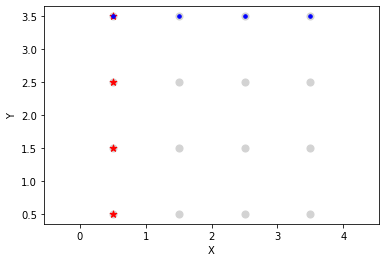

In [4]:
#NBVAL_IGNORE_OUTPUT
fig = op.topotools.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                    markersize=50)
fig = op.topotools.plot_coordinates(pn, P_left, c='red', marker='*', 
                                    markersize=50, fig=fig)
fig = op.topotools.plot_coordinates(pn, P_bottom, c='blue', marker='.', 
                                    markersize=50, fig=fig)

We'll merge these pores into a single set, and explore the different ways to find neighbors to this set.  Note that the pore at [x,y] = [1.5, 1.5] has two neighbors (one 'bottom' and one 'left'). 

### Find All Neighbors: OR
> *Finds all pores with one or more connections to the input pores*

Given a set of pores, find the pores that are neighbors to one or more of the inputs.  This is called **OR** since it gives the neighbors of either the bottom pores *or* the left pores, *or* both.  

In [5]:
Ps = pn.pores(['left', 'back'])
print(Ps)
Ps = pn.find_neighbor_pores(pores=Ps, mode='or')
print(Ps)

[ 0  1  2  3  7 11 15]
[ 4  5  6 10 14]


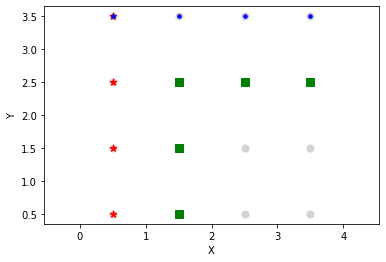

In [6]:
#NBVAL_IGNORE_OUTPUT
fig = op.topotools.plot_coordinates(pn, pn.Ps, c='lightgrey',
                                   markersize=50)
fig = op.topotools.plot_coordinates(pn, P_left, c='red', 
                                    markersize=50, marker='*', fig=fig)
fig = op.topotools.plot_coordinates(pn, P_bottom, c='blue', 
                                    markersize=50, marker='.', fig=fig)
fig = op.topotools.plot_coordinates(pn, Ps, c='green', 
                                    markersize=50, marker='s', fig=fig)

### Find Non-Shared Neighbors: XOR
> *Finds all pores with exactly one connection to the input pores*

Given a set of pores find the pores that are neighbors of one and only one of the input pores.  This is called **XOR**, or 'exclusve_or' because it finds the pores that are neigbhors to the 'bottom' *or* the 'left', but *not* both. 

In [7]:
Ps = pn.pores(['left', 'back'])
print(Ps)
Ps = pn.find_neighbor_pores (pores=Ps, mode='xor')
print(Ps)

[ 0  1  2  3  7 11 15]
[ 4  5 10 14]


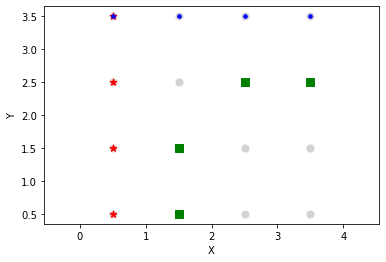

In [8]:
#NBVAL_IGNORE_OUTPUT
fig = op.topotools.plot_coordinates(pn, pn.Ps, c='lightgrey',
                                   markersize=50)
fig = op.topotools.plot_coordinates(pn, P_left, c='red', 
                                    markersize=50, marker='*', fig=fig)
fig = op.topotools.plot_coordinates(pn, P_bottom, c='blue', 
                                    markersize=50, marker='.', fig=fig)
fig = op.topotools.plot_coordinates(pn, Ps, c='green', 
                                    markersize=50, marker='s', fig=fig)

### Find Common Neighbors of Two Sets: XNOR

> *Finds all the pores with 2 or more connections to the input pores*

This finds pores that are common to both 'left' and 'bottom' pores.  It is called **XNOR** since it is the opposite of **XOR** , incidated by the *N for not* .   Note that **XNOR** and **NXOR** are interchangable.

In [9]:
Ps = pn.pores(['left', 'back'])
print(Ps)
Ps = pn.find_neighbor_pores(pores=Ps, mode='xnor')
print(Ps)

[ 0  1  2  3  7 11 15]
[6]


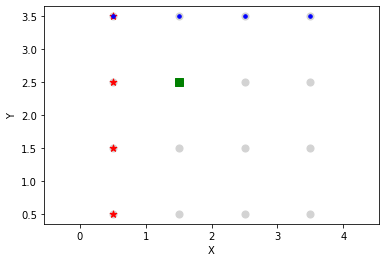

In [10]:
#NBVAL_IGNORE_OUTPUT
fig = op.topotools.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                    markersize=50)
fig = op.topotools.plot_coordinates(pn, P_left, c='red', 
                                    markersize=50, marker='*', fig=fig)
fig = op.topotools.plot_coordinates(pn, P_bottom, c='blue', 
                                    markersize=50, marker='.', fig=fig)
fig = op.topotools.plot_coordinates(pn, Ps, c='green', 
                                    markersize=50, marker='s', fig=fig)

## Find Neighboring Throats
Neighbor throat queries follow essentially the same logic as the neighboring queries outlined above.  

### Find All Neighboring Throats: OR
> *Finds all throats connected to any of the input pores*



In [11]:
Ps = pn.pores(['left', 'back'])
Ts = pn.find_neighbor_throats(pores=Ps, mode='or')

(0.25, 3.75)

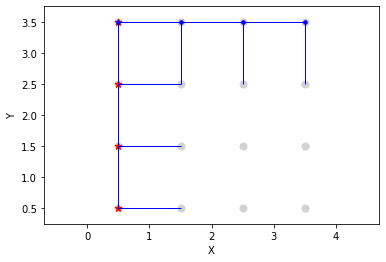

In [12]:
##NBVAL_IGNORE_OUTPUT
fig = op.topotools.plot_connections(pn, Ts)
fig = op.topotools.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                    markersize=50, fig=fig)
fig = op.topotools.plot_coordinates(pn, P_left, c='red', 
                                    markersize=50, marker='*', fig=fig)
fig = op.topotools.plot_coordinates(pn, P_bottom, c='blue', 
                                    markersize=50, marker='.', fig=fig)
ax = fig.gca()
ax.set_xlim(0.25, 3.75)
ax.set_ylim(0.25, 3.75)

### Find Common Neighbors: XNOR
> *Finds throats shared by input pores only*

In [13]:
Ps = pn.pores(['left', 'back'])
Ts = pn.find_neighbor_throats(pores=Ps, mode='xnor')

(0.25, 3.75)

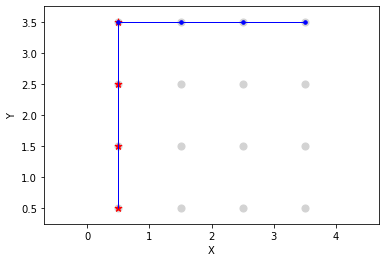

In [14]:
##NBVAL_IGNORE_OUTPUT
fig = op.topotools.plot_connections(pn, Ts)
fig = op.topotools.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                    markersize=50, fig=fig)
fig = op.topotools.plot_coordinates(pn, P_left, c='red', 
                                    markersize=50, marker='*', fig=fig)
fig = op.topotools.plot_coordinates(pn, P_bottom, c='blue', 
                                    markersize=50, marker='.', fig=fig)
ax = fig.gca()
ax.set_xlim(0.25, 3.75)
ax.set_ylim(0.25, 3.75)

### Find Non-Shared Neighbors: XOR
> *Finds throats that are only connected to one input pore*

In [15]:
Ps = pn.pores(['left', 'back'])
Ts = pn.find_neighbor_throats(pores=Ps, mode='xor')

(0.25, 3.75)

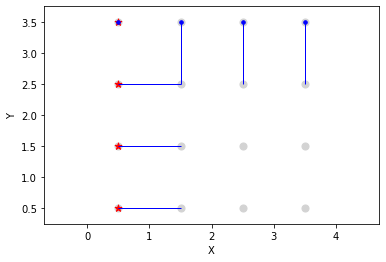

In [16]:
##NBVAL_IGNORE_OUTPUT
fig = op.topotools.plot_connections(pn, Ts)
fig = op.topotools.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                    markersize=50, fig=fig)
fig = op.topotools.plot_coordinates(pn, P_left, c='red', 
                                    markersize=50, marker='*', fig=fig)
fig = op.topotools.plot_coordinates(pn, P_bottom, c='blue', 
                                    markersize=50, marker='.', fig=fig)
ax = fig.gca()
ax.set_xlim(0.25, 3.75)
ax.set_ylim(0.25, 3.75)